In [3]:
import pandas as pd
import datetime
import missingno
import os
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import pytz

est = pytz.timezone('US/Eastern')
utc = pytz.utc

<b>Load Data and Join Initial Datasets, Clean as Needed</b>

In [4]:
#note for david's structure
cd = os.getcwd()
raw_data_directory_path = "/".join(cd.split("/")[:-1]) + "/data/raw/"
processed_data_directory_path = "/".join(cd.split("/")[:-1]) + "/data/processed/"

In [44]:
#enter your appriate path/paths here if the above doesn't work, up to the data folder you put the 
#raw and processed data folders in
                            #ENTER THE BEGINNING OF YOur PATH TO RAW AND PROCESSED HERE
raw_data_directory_path = 'C:/Users/heath/Desktop/W207/w207_final_project/w207_final_project/data/raw/'
processed_data_directory_path = 'C:/Users/heath/Desktop/W207/w207_final_project/w207_final_project/data/processed/'

In [41]:
tweets = pd.read_csv(raw_data_directory_path+'tweet_data/Tweet.csv')

In [42]:
company_tweets = pd.read_csv(raw_data_directory_path +'tweet_data/Company_Tweet.csv')

In [43]:
company = pd.read_csv(raw_data_directory_path +'tweet_data/Company.csv')

In [14]:
tweet_combo = pd.merge(tweets, company_tweets)

In [15]:
tweet_combo = pd.merge(tweet_combo, company)

In [26]:
tweet_combo.ticker_symbol.unique()

array(['AAPL', 'AMZN', 'TSLA', 'MSFT', 'GOOG', 'GOOGL'], dtype=object)

In [17]:
companynasdaq = pd.read_csv(raw_data_directory_path + 'stock_data/Company.csv')

In [18]:
company_val = pd.read_csv(raw_data_directory_path+'stock_data/CompanyValues.csv')

In [19]:
company_val.day_date = pd.to_datetime(company_val.day_date,format='%Y-%m-%d %H:%M:%S')

In [20]:
#we want to drop the duplicates and keep the max per day with hour min sec, and then convert back to just looking at the day.
#keeping the day makes it easier to join the datasets on tweets that day compared to market close and adjustment per day
company_val .sort_values(['day_date'], ascending=True, inplace=True)
company_val = company_val.drop_duplicates(subset = ['day_date', 'ticker_symbol'], keep = 'last')

In [21]:
#get stock data 2015 plus to match our tweet data dates
company_val.day_date = pd.to_datetime(company_val.day_date,format='%Y-%m-%d')
company_val = company_val.loc[company_val.day_date >= '2015-01-01']

In [22]:
#check to make sure filter worked
company_val.day_date.min()

Timestamp('2015-01-01 00:00:00')

In [23]:
stock_prices = pd.merge(company_val, companynasdaq)

In [24]:
stock_prices
stock_prices.sort_values(['day_date'], ascending=True, inplace=True)

In [27]:
stock_prices.ticker_symbol.unique() #keeping GOOG and GOOGL for now since both in twitter data

array(['MSFT', 'TSLA', 'GOOG', 'AMZN', 'GOOGL', 'AAPL'], dtype=object)

In [28]:
stock_prices.company_name.unique()

array(['Microsoft', 'Tesla Inc', 'Google Inc', 'Amazon.com', 'apple'],
      dtype=object)

In [55]:
#replacing 'GOOG' and 'GOOGL' are actually two different stocks from Google Inc.
#https://seekingalpha.com/article/4430928-which-google-stock-is-a-better-buy-goog-or-googl

In [29]:
#also we have duplicates every day now so just keep the latest one
stock_prices = stock_prices.drop_duplicates(subset = ['day_date', 'ticker_symbol'], keep = 'last')

In [30]:
tickers = list(stock_prices.ticker_symbol.unique())
tickers

['MSFT', 'TSLA', 'GOOG', 'AMZN', 'GOOGL', 'AAPL']

In [31]:
#create stock return % change from previous day
stock_prices['return'] = stock_prices.groupby('ticker_symbol')['close_value'].pct_change()

In [32]:
stock_prices.head(50)

,ticker_symbol,day_date,close_value,volume,open_value,high_value,low_value,company_name,return
0,MSFT,2015-01-01,46.450,21551090,46.73,47.4400,46.4500,Microsoft,NaN
3858,TSLA,2015-01-01,222.410,2392947,223.09,225.6800,222.2500,Tesla Inc,NaN
5787,GOOG,2015-01-01,526.400,1367110,531.25,532.6000,525.8000,Google Inc,NaN
7716,AMZN,2015-01-01,310.350,2048676,311.55,312.9800,310.0100,Amazon.com,NaN
9645,GOOGL,2015-01-01,530.660,1235889,537.74,538.4000,530.2000,Google Inc,NaN
1929,AAPL,2015-01-01,110.380,41304780,112.82,113.1300,110.2100,apple,NaN
3859,TSLA,2015-01-02,219.310,4753239,222.87,223.2500,213.2600,Tesla Inc,-0.013938
5788,GOOG,2015-01-02,524.810,1444809,529.01,531.2700,524.1000,Google Inc,-0.003021
1930,AAPL,2015-01-02,109.330,53143770,111.39,111.4400,107.3500,apple,-0.009513
1,MSFT,2015-01-02,46.760,27843560,46.66,47.4200,46.5400,Microsoft,0.006674


In [34]:
#need to convert the tweet post date to date time and also account for stock prices being in est, so make tweets est

In [33]:
tweet_combo.post_date = tweet_combo.post_date.apply(lambda x: datetime.datetime.fromtimestamp(x).astimezone(est).strftime('%Y-%m-%d'))
tweet_combo.post_date = pd.to_datetime(tweet_combo.post_date, format='%Y-%m-%d')

In [35]:
len(tweet_combo)

4336445

In [25]:
#join on date and ticker symbol to get the stock price for the company for the date of the post

In [36]:
final_df = pd.merge(tweet_combo, stock_prices, left_on = ['post_date', 'ticker_symbol'], right_on = ['day_date', 'ticker_symbol'])

In [27]:
#lost x amount of tweets when merging stock data (171)

In [37]:
len(tweet_combo) - len(final_df)

171

In [38]:
final_df = final_df.rename(columns = {'company_name_x': 'company_name'})
final_df = final_df.drop(['company_name_y'], axis=1)

<b>Export to appropriate path here</b>

In [ ]:
#note that cleaned data features include:
    #joining tweet datasets on tweet IDs and then to stock data on post date (tweet data) and day date (stock data) and ticker symbol
    #making return per stock (percent change from previous day) - make over week for final dataset
    #converting datetimes and considerations for est
    #keeping stock data greater than 2015 to match our tweet data
    #acsending date sorting

In [45]:
final_df.to_csv(processed_data_directory_path+'cleaned_data.csv')

<b>Data Exploration ..</b>

In [50]:
#note I swear this works but it just broke on my system's memory
#produces a nice heat style of missing data - I would say we don't really have missing data in the final df
missingno.matrix(final_df,figsize=(10,5), fontsize=12)

MemoryError: 

In [32]:
#cool that we are actually not missing a lot of data, basically have full data for all values.


In [51]:
final_df.describe()

,tweet_id,comment_num,retweet_num,like_num,close_value,volume,open_value,high_value,low_value,return
count,4.336274e+06,4.336274e+06,4.336274e+06,4.336274e+06,4.336274e+06,4.336274e+06,4.336274e+06,4.336274e+06,4.336274e+06,4.335645e+06
mean,8.834413e+17,2.923867e-01,6.347207e-01,2.103661e+00,4.595990e+02,2.005131e+07,4.596834e+02,4.646605e+02,4.541944e+02,1.062431e-03
std,1.927660e+17,1.885780e+00,6.985978e+00,1.371765e+01,4.634337e+02,2.224596e+07,4.636247e+02,4.678384e+02,4.586462e+02,2.411999e-02
min,5.505179e+17,0.000000e+00,0.000000e+00,0.000000e+00,4.029000e+01,3.475180e+05,4.034000e+01,4.074000e+01,3.972000e+01,-1.390153e-01
25%,7.185662e+17,0.000000e+00,0.000000e+00,0.000000e+00,1.289500e+02,3.742816e+06,1.290800e+02,1.304900e+02,1.282400e+02,-6.375414e-03
50%,8.825983e+17,0.000000e+00,0.000000e+00,0.000000e+00,2.574800e+02,1.021294e+07,2.573500e+02,2.619900e+02,2.521000e+02,0.000000e+00
75%,1.054777e+18,0.000000e+00,0.000000e+00,1.000000e+00,7.017900e+02,3.034878e+07,7.010500e+02,7.080912e+02,6.940000e+02,9.249400e-03
max,1.212160e+18,6.310000e+02,9.990000e+02,9.990000e+02,2.039510e+03,1.691150e+08,2.038110e+03,2.050500e+03,2.013000e+03,1.766923e-01


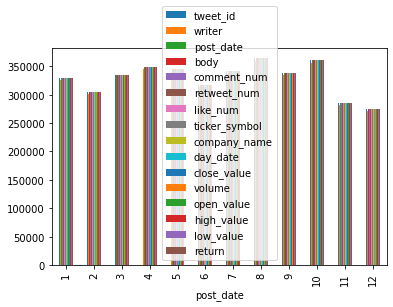

In [34]:
final_df.groupby(final_df["post_date"].dt.month).count().plot(kind="bar")